# 第八章  密度图

## 8.1 简介
在本章中将从一个基本的密度图开始，逐步解释添加到代码中的所有自定义功能,如图 8-1所示。

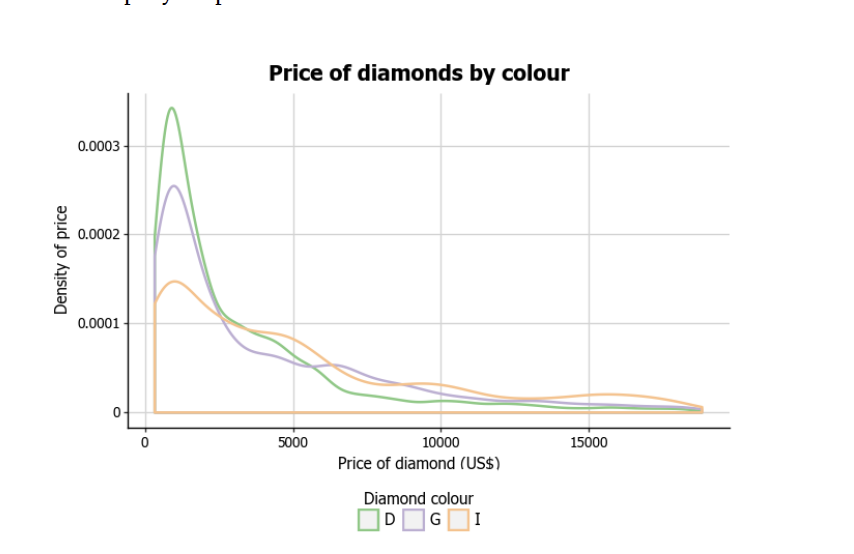

第一步是导入所有需要的包。为此，需要:
- pandas和它的DataFrame类来读入和处理数据
- plotnine来获取数据并创建图表；
- numpy以便在图表中进行一些基本的数学计算。 在本章中使用 plotnine 的 figure_size 函数来调整图的大小，使图表显示得更整洁。

In [1]:
import numpy as np
import pandas as pd
import plotnine
plotnine.options.figure_size=(7.5, 4.2)
from plotnine import *
from plotnine import data
from pandas import DataFrame

在此例子中，将使用来自 plotnine 的数据模块的diamonds 数据集


In [2]:
diamonds = data.diamonds

## 8.2 ggplot的基本结构
为了初始化一个密度图，需要告诉ggplot  diamonds是数据，并指定要绘制的是价格变量（通过参数position 分配到x轴上）。把X和Y变量 放在一个叫做aes的方法中，aes是审美映射的简称，aes决定了不同变量将被如何映射到图表的哪个部分。这里ggplot已经将价格映射到了X轴上，而目前，Y轴是空白的。 可能还注意到，图中没有任何东西，如图 8-2所示。为了呈现 数据，需要告诉ggplot想如何直观地表现它。

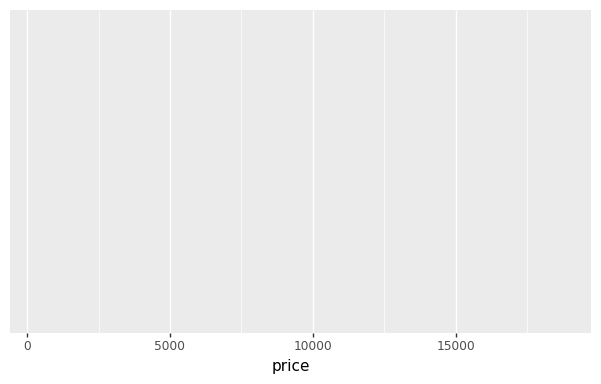

<ggplot: (123398088488)>

In [3]:
p8 = ggplot(diamonds, aes("price"))
p8

## 8.3 基本密度图
在密度图的情况下，使用geom_ density()原语来绘制基本密度图，如图 8-3所示。

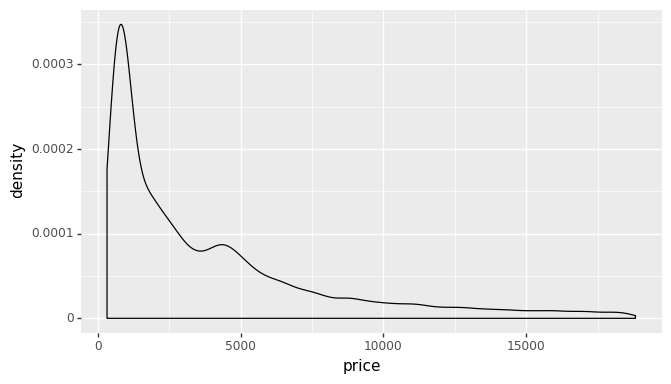

<ggplot: (123429596745)>

In [4]:
p8 = ggplot(diamonds, aes("price")) + geom_density()
p8

## 8.4 调整轴标签和添加标题
为了添加标题，可以在ggtitle中加入了作为一个字符串参数作为图形的名称，同样要使用xlab和 ylab参数来改变轴的名称，如图 8-4所示。。

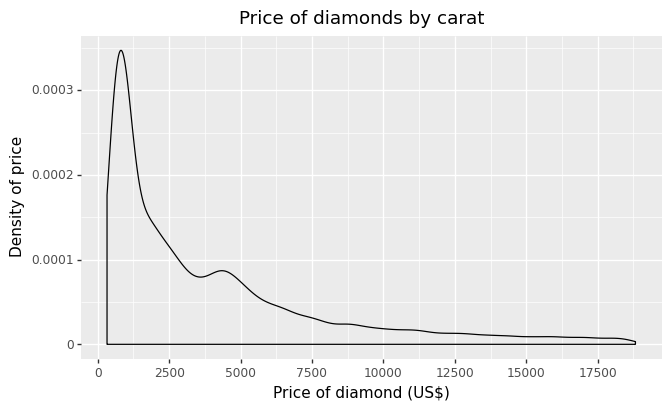

<ggplot: (123429648138)>

In [5]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density()
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
)
p8

## 8.5调整调色板
有几个调整颜色的选项。第一个是通过名称来改变颜色。 plotnine 使用 matplotlib 使用的调色板，而 ggplot 识别matplotlib的全套命名颜色。试着把条形图变成两种紫色，如图 8-5所示。要做到这一点，需要填充和颜色选项。当然，要使条形图成为单一颜色，可以只需把填充和颜色都指定相同的颜色名称即可。

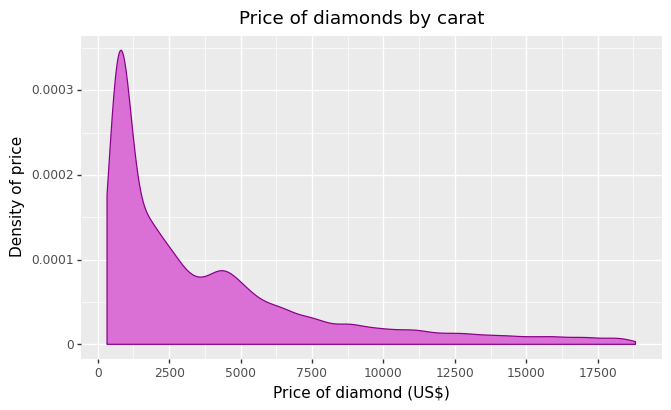

<ggplot: (123429778264)>

In [6]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="darkmagenta", fill="orchid")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
)
p8

如果想超出上面列表中的颜色选项，也可以指定精确的 HEX颜色，将它们作为一个字符串，前面加一个HEX值，例如，"#FFFFFF"。 下面，用HEX代码为填充和线条使用了两种蓝色，如图 8-6所示。


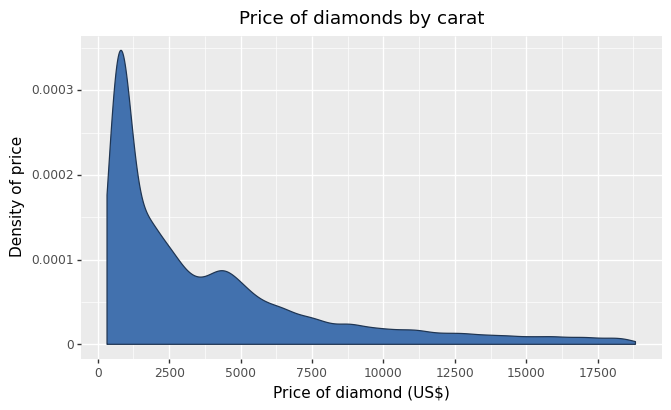

<ggplot: (123429722953)>

In [7]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
)
p8

也可以用geom_density中的参数alpha来指定密度填充区的透明程度，如图 8-7所示。 而参数alpha的围从0到1。

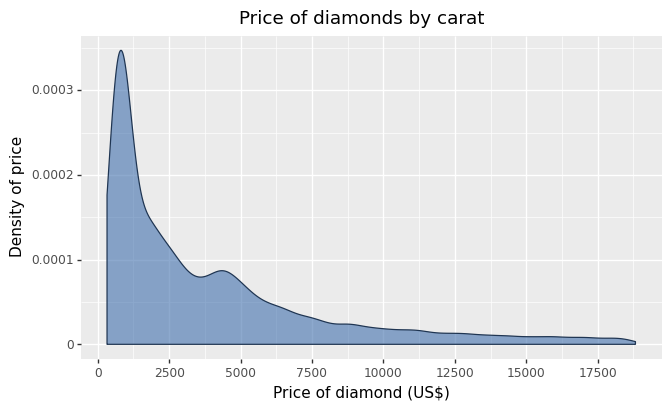

<ggplot: (123429655498)>

In [8]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE",
alpha=0.6)
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
)
p8

## 8.6 使用白色主题
还可以使用主题来改变图表的整体外观。使用 一个简单的主题定制，在当前的代码后面添加 theme_bw() 。

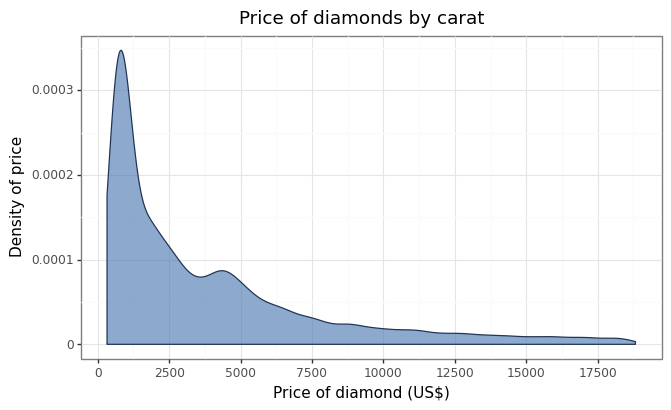

<ggplot: (123429764747)>

In [9]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE",
alpha=0.6)
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ theme_bw()
)
p8

## 8.7 创建一个XKCD风格的图表
当然，可能也想创建自己的主题。 自己的主题具有非常高的定制化程度，包括允许使用导入的字体。 plotnine 已经有一个 theme_xkcd() 实现，但这里还是从头开始创建了一个， 这里将解释如何使用导入的字体和一些 主题中的其他选项来调图表的整体外观。 为了创建这个图表，首先需要下载XKCD字体。 Randall Munroe在这里友好地提供了。一旦你有了它，就可以使用matplotlib.font_manager类把它加载到 到Python中。

In [10]:
import matplotlib.font_manager as fm
fpath = "xkcd-Regular.otf"

由于这是一种导入的字体，不能在图形中直接改变其大小。 相反，需要改变导入的字体对象来改变其大小，由于希望标题和正文有不同的字体大小，将创建两个不同的 字体对象，title_text和body_set。
然后可以在这些对象上调用方法（可用的方法列表见 这里）。对于标题，我们将把字体改为18号，并使用 set_size()和set_weight()方法将其改为粗体。同样地，把正文的 文字改为12号。

In [11]:
# Create font objects
title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)
# Alter size and weight of font objects
title_text.set_size(18)
title_text.set_weight("bold")
body_text.set_size(12)

更多的变化。
- 改变 axis_line_x 和 axis_line_y 的值可以改变轴线的粗细。
轴线的厚度。
- 将legend_key的参数设置为element_blank()，可以去掉图例周围的方框。
去掉图例周围的方框。
- 为了去掉网格线，我们需要改变四个参数的值。 panel_grid_major, panel_grid_minor, panel_border 和 panel_-
背景。
- 为了使用刚刚导入的XKCD字体，需要改变以下参数的值
需要改变plot_title和text的值。
- 最后，为了将文本的颜色改为黑色（从默认的灰色），我们要改变 axis_text_x 和 axis_text_y 的值

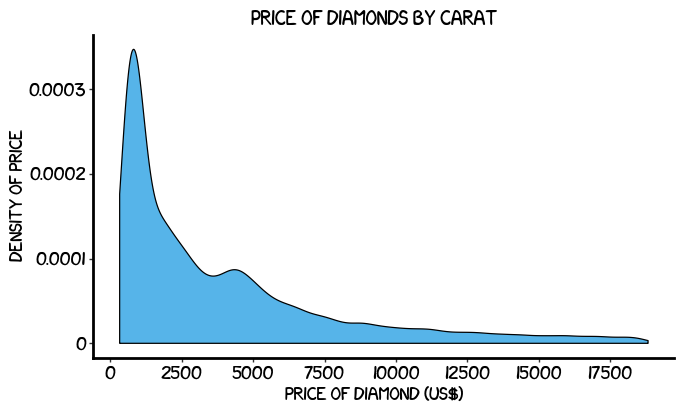

<ggplot: (123429500495)>

In [12]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="black", fill="#56B4E9")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ theme(
axis_line_x=element_line(size=2, colour="black"),
axis_line_y=element_line(size=2, colour="black"),
panel_grid_major=element_blank(),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
    plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
axis_text_x=element_text(colour="black"),
axis_text_y=element_text(colour="black"),
)
)
p8

### 8.8 使用 "538 "主题
作为ggplot软件包的一部分，还有更多的预建主题可供选择。下面应用了theme_538()。 在axis_title、plot_title和text中使用了市面上的字体 "Atlas Grotesk "和 "Decima Mono Pro'。 

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36 ($) missing from current font.


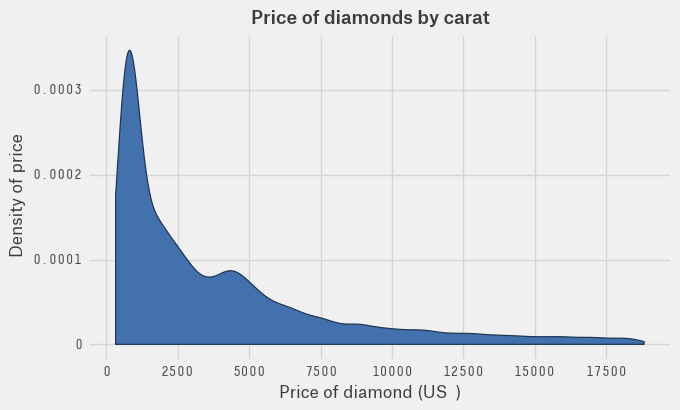

<ggplot: (123429972203)>

In [13]:
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"
# Create font objects
title_text = fm.FontProperties(fname=agm)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)
# Alter size and weight of font objects
title_text.set_size(16)
axis_text.set_size(12)
body_text.set_size(10)
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds by carat")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ theme_538()
+ theme(
axis_title=element_text(fontproperties=axis_text),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
)
)
p8

## 8.9 创建自己的主题
现在，已经探索了图定制中的一些可用选项。 现在可以建立自己的完全定制的图表，如图 8-9所示。
- 改变 axis_line 的大小和颜色参数，使线条变粗并将颜色改为黑色。
- 改变传递给panel_grid_major的颜色参数意味着所有的主要网格线现在是浅灰色的。
- 通过改变 panel_grid_major 的参数来去除次要网格线和背景。同样，通过改变 panel_grid_minor、panel_border 和 panel_background 的参数来去除次要网格线和背景。

使用标准字体Tahoma字体。

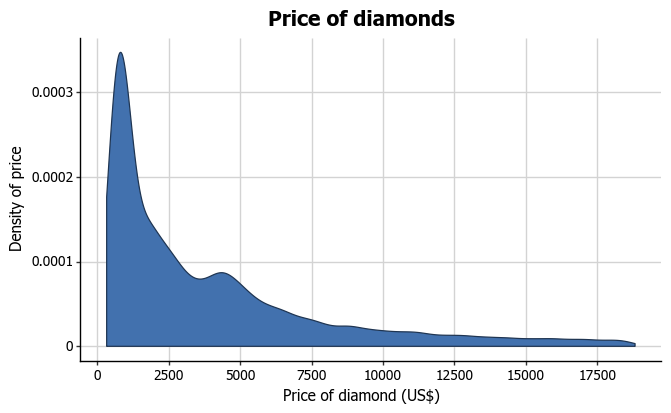

<ggplot: (123431429810)>

In [14]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8

## 8.10 添加线条
假设想在图表中添加一个截止值（在5000美元），将 geom_vline 原语添加到图表中，并使用xintercept参数指定它在x轴上的位置，如图 8-10所示。 可以使用geom_vline中的颜色和线型参数来定制它的外观，如。可以以同样的方式，使用geom_hline来添加水平线。

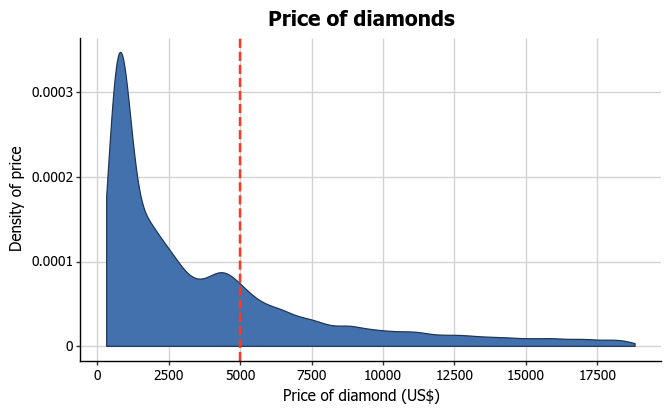

<ggplot: (123431453504)>

In [15]:
p8 = (
ggplot(diamonds, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE")
+ scale_x_continuous(breaks=np.arange(0, 22500, 2500))
+ ggtitle("Price of diamonds")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ geom_vline(xintercept=5000, size=1, colour="#FF3721",
linetype="dashed")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
                        face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8

##   8.11 多重密度图
也可以通过另一个变量轻松创建多个密度图，如图 8-11所示。 有两种选择，在单独的图中或在同一张图表中创建多个密度图。 为了创建面板图，首先需要做一些数据处理。为了 为了使图表更加清晰，保留了带有 "D "或 "G "的钻石。 颜色为 "D"、"G "或 "I "的钻石保存在一个新的数据集中，即 diamonds_trimmed。还需要重置颜色的级别，先把它变成一个字符串，然后用 astype方法将其转换为字符串类别。 为了产生一个按颜色划分的面板图，在图中添加facet_grid(".~color") 选项。facet_grid中使用额外的scales = free参数意味着每个图的y轴不需要相同，将scale_x_continuous中的断点改回了5000，因为x轴看起来有点拥挤。

C:\Users\xu\AppData\Local\Temp\ipykernel_17968\1292235246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


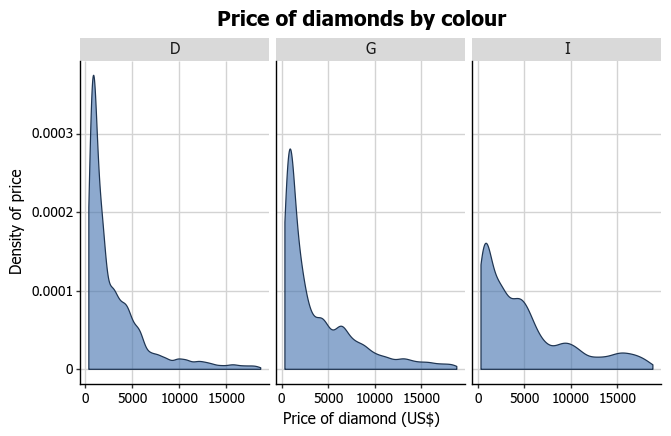

<ggplot: (123434330468)>

In [16]:
diamonds_trimmed = diamonds[diamonds["color"].isin(["D", "G", "I"])]
diamonds_trimmed["color"] = diamonds_trimmed["color"].\
astype("str").astype("category")
p8 = (
ggplot(diamonds_trimmed, aes("price"))
+ geom_density(colour="#1F3552", fill="#4271AE", alpha=0.6)
+ scale_x_continuous(breaks=np.arange(0, 22500, 5000))
+ ggtitle("Price of diamonds by colour")
+ xlab("Price of diamond (US$)") + ylab("Density of price")
+ facet_grid(".~color", scales="free")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10)))
p8

另外，也可以在同一张图上绘制三种钻石颜色，如图 8-12所示。首先。 在ggplot函数中，给aes添加一个fill=cut参数。其次， 在geom_density()原语中加入两个参数。 position="identity "和alpha=0.70。这可以控制曲线的位置和透明度 。最后，可以通过添加scale_density()方法来定制密度图的颜色。最后，可以通过向密度图添加scale_fill_brewer来定制密度图的颜色。接着需要使用类型参数指定颜色方案属于哪个组 qualitative（qual）、sequential（seq）和diverging（div）。

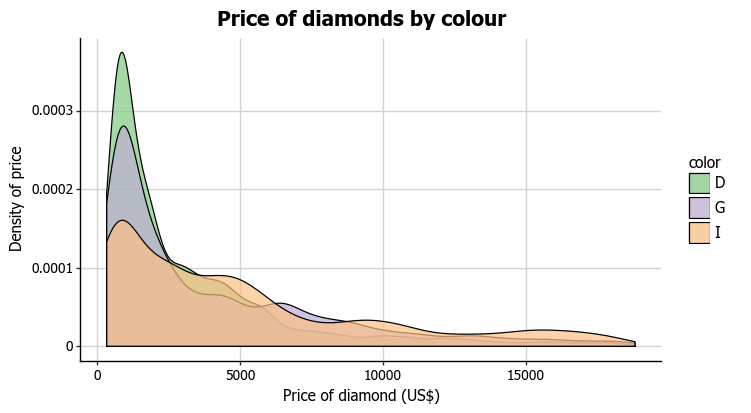

<ggplot: (123434521685)>

In [17]:
p8 = (
ggplot(diamonds_trimmed, aes("price", fill="color"))
+ geom_density(position="identity", alpha=0.70)
+ scale_x_continuous(breaks=np.arange(0, 22500, 5000))
+ ggtitle("Price of diamonds by colour")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ scale_fill_brewer(type="qual", palette="Accent")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8


这些密度图有点难看，可以使密度图堆叠在一起其更容易查看， 要做到这一点，把geom_density中的position="stack" 换成geom_density中的position="identity"，如图 8-13所示。

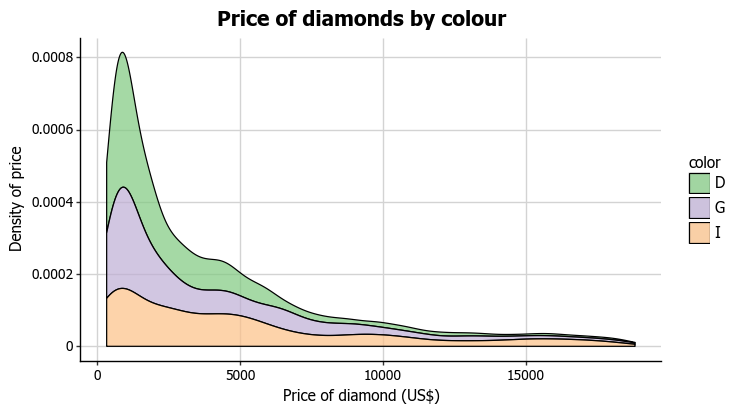

<ggplot: (123434478547)>

In [18]:
p8 = (
ggplot(diamonds_trimmed, aes("price", fill="color"))
+ geom_density(position="stack", alpha=0.70)
+ scale_x_continuous(breaks=np.arange(0, 22500, 5000))
+ ggtitle("Price of diamonds by colour")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ scale_fill_brewer(type="qual", palette="Accent")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8

另一个使其更容易看情密度图的方法是去掉密度图填充色，如图 8-14所示。要做到这一点需要做一些改变。需要将ggplot中的fill=color 换成color=color。在geom_density()中加入了fill=None并且同时还加入了size=1以便让数据更清晰。 添加了size=1使得容易看到线条。最后，把scale_fill_brewer() 方法，改为scale_colour_brewer()。

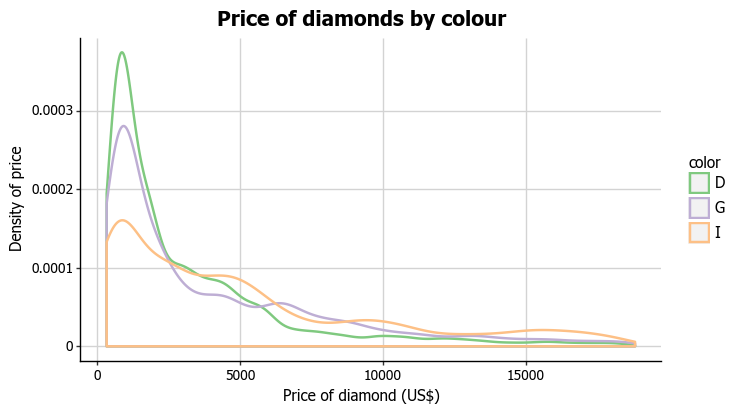

<ggplot: (123431425675)>

In [19]:
p8 = (
ggplot(diamonds_trimmed, aes("price", colour="color"))
+ geom_density(position="identity", fill=None, size=1)
+ scale_x_continuous(breaks=np.arange(0, 22500, 5000))
+ ggtitle("Price of diamonds by colour")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8

## 8.12 设置图例的格式
最后，可以对图例进行格式化。首先，可以通过添加参数 legend_position="bottom "来改变图例的位置。 将图例移到图的下面。也可以将图例的方向改为水平方向 。还可以 通过添加 legend_title_align="center "使图例居中。 使用 legend_box_spacing=0.4 来调整图例位置。最后，可以通过添加labs(color="color")来固定标题文本。通过所有这些定制，现在有了在 本章开头的图表，如图 8-15所示。

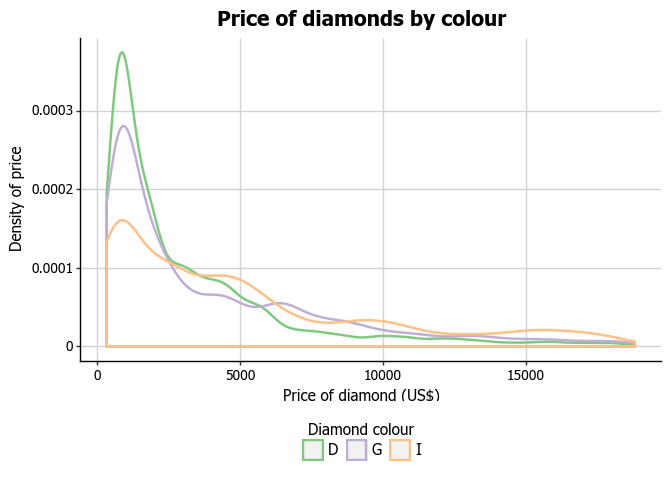

<ggplot: (123434463585)>

In [20]:
p8 = (
ggplot(diamonds_trimmed, aes("price", colour="color"))
+ geom_density(position="identity", fill=None, size=1)
+ scale_x_continuous(breaks=np.arange(0, 22500, 5000))
+ ggtitle("Price of diamonds by colour")
+ xlab("Price of diamond (US$)")
+ ylab("Density of price")
+ labs(colour="Diamond colour")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
    legend_box_spacing=0.4,
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p8